In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
%%latex
The aim of this code is to simulate a total or partial reaction with an equation of the form $aA+bB\rightleftharpoons cC+dD$. If 

<IPython.core.display.Latex object>

In [3]:
# Chemical set-up
cA_i,cB_i,cC_i,cD_i=0.02,0.05,0,0 # in mol/L, set cA or cB to zero if there is just one reactant 
a,b,c,d=1,2,1,0                   # set a or b to zero if one reactant, c or d to zero if one product. 
direct=True                       # True if the reaction take splace in the direct way, False otherwise.
K=1000                            # set to zero if unknown

# Computing stuff
nb_points=1000                    # Number of points used to plot
names=True                        # If you want to put names on the different species.
name_A,name_B,name_C,name_D=r'Pb$^{2+}$',r'I$^-$',r'PbI$_2$','ballek' # Set the names


In [4]:
def max_reaction_extent(concentrations_i,stoichio):
    cA_i,cB_i=concentrations_i[0],concentrations_i[1]
    a,b=stoichio[0],stoichio[1]
    if a==0:
        return(cB_i/b)
    elif b==0:
        return(cA_i/a)
    else:
        return(np.min([cA_i/a,cB_i/b]))

def reaction_quotient(concentrations,stoichio):
    cA,cB,cC,cD=concentrations[0],concentrations[1],concentrations[2],concentrations[3]
    a,b,c,d=stoichio[0],stoichio[1],stoichio[2],stoichio[3]
    if a==0:
        return(cC**c*cD**d/cB**b)
    elif b==0:
        return(cC**c*cD**d/cA**a)
    else:
        return((cC**c*cD**d)/(cA**a*cB**b))

def final_extent(concentrations,stoichio,y,K,Qr):
    if K!=0:
        i=0
        while Qr[i]<K and i<nb_points:
            i+=1
        return(y[i],i)
    else:
        return("ERROR : can't compute the final extent without the equilibrium constant K",'')

In [5]:
# Initial concentrations
if direct:
    concentrations_i=np.array([cA_i,cB_i,cC_i,cD_i])
    stoichio=np.array([a,b,c,d])
else:
    concentrations_i=np.array([cC_i,cD_i,cA_i,cB_i])
    stoichio=np.array([c,d,a,b])


# Reaction extent with max
y_max=max_reaction_extent(concentrations_i,stoichio)
y=np.linspace(0,y_max,nb_points)


# Concentrations evolution
concentrations=np.zeros((4,nb_points))
if direct:
    cA,cB,cC,cD=cA_i-a*y,cB_i-b*y,cC_i+c*y,cD_i+d*y
    concentrations[0],concentrations[1],concentrations[2],concentrations[3]=cA,cB,cC,cD
else:
    cA,cB,cD,cD=cA_i+a*y,cB_i+b*y,cC_i-c*y,cD_i-d*y
    concentrations=np.array([cC,cD,cA,cB])
    
# Reaction quotient
Qr=reaction_quotient(concentrations,stoichio)

# Final reaction extent and extent rate
if K!=0: 
    y_f=final_extent(concentrations,stoichio,y,K,Qr)[0]
    tau_f=y_f/y_max  



<ipython-input-4-52460aa8387c>:19: RuntimeWarning: divide by zero encountered in true_divide
  return((cC**c*cD**d)/(cA**a*cB**b))


In [6]:
print('Max reaction extent : ')
print(y_max)
if K!=0:
    print('\nFinal reaction extent : ')
    print(y_f)
    print('\nFinal extent rate : ')
    print(str(tau_f*100)+' %')
else:
    print("Can't compute the final extent without the equilibrium constant K")

Max reaction extent : 
0.02

Final reaction extent : 
0.009689689689689689

Final extent rate : 
48.448448448448445 %


Text(0.5, 1.0, 'Total reaction')

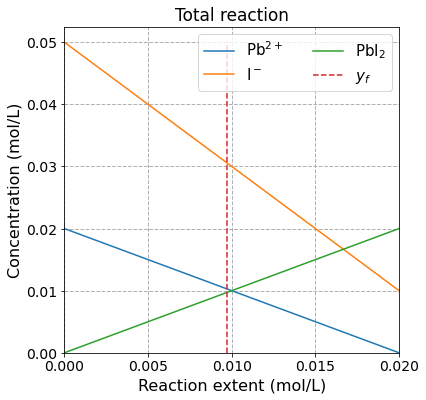

In [7]:
############## CONCENTRATIONS ##############



if K!=0 and tau_f<0.999:
    print("WARNING : The reaction is not total")
elif K!=0 and tau_f>=0.999: 
    print("No worries, the reaction is total")
else:
    print("Can't compute the final extent without the equilibrium constant K")
    
    

fig,ax0=plt.subplots(figsize=(6,6))


# Plots
if names:
    if a!=0:
        ax0.plot(y,concentrations[0],label=name_A)
    if b!=0:
        ax0.plot(y,concentrations[1],label=name_B)
    if c!=0:
        ax0.plot(y,concentrations[2],label=name_C)
    if d!=0:
        ax0.plot(y,concentrations[3],label=name_D)
else :
    if a!=0:
        ax0.plot(y,concentrations[0],label=r'$c_A$')
    if b!=0:
        ax0.plot(y,concentrations[1],label=r'$c_B$')
    if c!=0:
        ax0.plot(y,concentrations[2],label=r'$c_C$')
    if d!=0:
        ax0.plot(y,concentrations[3],label=r'$c_D$')
        
# Ticks
plt.xticks([0,y_max/4,y_max/2,3*y_max/4,y_max],fontsize=14)
plt.yticks(fontsize=14)

# Constrain the domain
ax0.set_xlim(0,y_max)
ax0.set_ylim(0)

#Grid
ax0.grid(linestyle='dashed',linewidth=1)


# Final extent
if K!=0 and tau_f<0.999:
    ax0.plot([y_f,y_f],[np.min(concentrations),np.max(concentrations)],linestyle='dashed',label=r'$y_f$')

# Legend and titles
ax0.legend(fontsize=15,ncol=2)

ax0.set_xlabel('Reaction extent (mol/L)',fontsize=16)
ax0.set_ylabel('Concentration (mol/L)',fontsize=16)
ax0.set_title('Total reaction', fontsize=17)

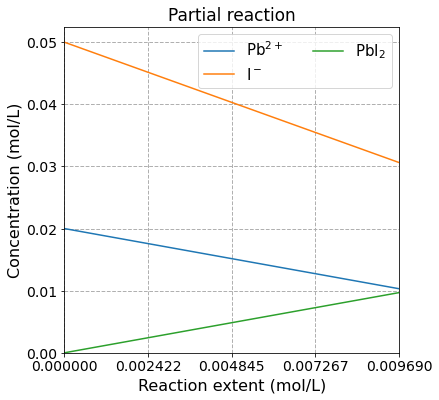

In [9]:
############## CONCENTRATIONS ##############

if K!=0 and tau_f<0.999:
    fig,ax0=plt.subplots(figsize=(6,6))
    cut=final_extent(concentrations,stoichio,y,K,Qr)[1]

    # Plots
    if names:
        if a!=0:
            ax0.plot(y[:cut],concentrations[0,:cut],label=name_A)
        if b!=0:
            ax0.plot(y[:cut],concentrations[1,:cut],label=name_B)
        if c!=0:
            ax0.plot(y[:cut],concentrations[2,:cut],label=name_C)
        if d!=0:
            ax0.plot(y[:cut],concentrations[3,:cut],label=name_D)
    else :
        if a!=0:
            ax0.plot(y[:cut],concentrations[0,:cut],label=r'$c_A$')
        if b!=0:
            ax0.plot(y[:cut],concentrations[1,:cut],label=r'$c_B$')
        if c!=0:
            ax0.plot(y[:cut],concentrations[2,:cut],label=r'$c_C$')
        if d!=0:
            ax0.plot(y[:cut],concentrations[3,:cut],label=r'$c_D$')

    # Ticks
    plt.xticks([0,y_f/4,y_f/2,3*y_f/4,y_f],fontsize=14)
    plt.yticks(fontsize=14)

    # Constrain the domain
    ax0.set_xlim(0,y_f)
    ax0.set_ylim(0)

    #Grid
    ax0.grid(linestyle='dashed',linewidth=1)

    # Legend and titles
    ax0.legend(fontsize=15,ncol=2)

    ax0.set_xlabel('Reaction extent (mol/L)',fontsize=16)
    ax0.set_ylabel('Concentration (mol/L)',fontsize=16)
    ax0.set_title('Partial reaction', fontsize=17)

elif K!=0 and tau_f>0.999 :
    print("You don't need this cell because the reaction is total")
else:
    print("You don't need this cell because K is unknown")

In [ ]:
############### REACTION QUOTIENT #############
fig,ax=plt.subplots(figsize=(6,6))
ax.plot(y[:500],Qr[:500],label=r'$Q_r$')
ax.set_title('Reaction quotient', fontsize=17)
#plt.xticks([0,y_max/4,y_max/2,3*y_max/4,y_max],fontsize=14)
plt.yticks(fontsize=14)


In [13]:
np.log10(0.0004)//1

-4.0